In [0]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
consumerKey #confidential
consumerSecret  #confidential
accessToken  #confidential
accessTokenSecret  #confidential

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [72]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Met Sh Amit Shah, Hon’ble HM. Discussed the situation on corona in Delhi in detail. He assured of all cooperation.

2) This is such a heartwarming gesture by our MLA Somnath Bharti ji https://t.co/xONgNDCkww

3) जितने बेड दिल्ली के लोगों के लिए चाहिए होंगे, उतने ही बेड दूसरे राज्यों से आने वाले लोगों के लिए चाहिए होंगे। ये बहुत बड़ी चुनौती है, लेकिन हम पूरी कोशिश करेंगे।

हम होटल्स, स्टेडीयम्स को तैयार करवाएँगे। इसके लिए मैं ख़ुद ज़मीन पर उतरूँगा। हमारी नीयत, कोशिश में कमी नज़र नहीं आएगी https://t.co/WWJUqNhSWF

4) कोरोना के केसेस अब बहुत तेजी से बढ़ने लगे हैं। अगर हमें अपने आप को संक्रमण से बचाना है तो हमें इन तीन चीजों को जन आंदोलन बनाना होगा - मास्क पहनना, सोशल डिस्टेंसिंग का पालन करना और साबुन से हाथ धोना। #DelhiFightsCorona https://t.co/ODvyxnx4xE

5) LG और केंद्र के आदेश को लागू किया जाएगा।   हमें एक दूसरे से नहीं, मिलकर कोरोना से लड़ना है। https://t.co/KX2Iu0Zfww



In [66]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @MumbaiPolice: Rakh Do Gaj Ki Doori,Na Dilo..."
1,Thank you all for getting us in touch with the...
2,"Kolkata, with unity comes strength and resilie..."
3,All my career my friend colleague and absolute...
4,May the blessings of Allah see us through thes...


In [67]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,": Rakh Do Gaj Ki Doori,Na Dilon Mein Faasla\nH..."
1,Thank you all for getting us in touch with the...
2,"Kolkata, with unity comes strength and resilie..."
3,All my career my friend colleague and absolute...
4,May the blessings of Allah see us through thes...
...,...
95,Damn multiple choice questions!? Was always aw...
96,Bas aap Dua mein yaad rakhna.
97,The ‘right thing’ is a personal feeling. Not b...
98,Wear a helmet!!!


In [68]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": Rakh Do Gaj Ki Doori,Na Dilon Mein Faasla\nH...",0.000000,0.000000
1,Thank you all for getting us in touch with the...,0.650000,0.078125
2,"Kolkata, with unity comes strength and resilie...",0.000000,0.000000
3,All my career my friend colleague and absolute...,0.912500,0.800000
4,May the blessings of Allah see us through thes...,0.600000,0.500000
...,...,...,...
95,Damn multiple choice questions!? Was always aw...,0.500000,-0.500000
96,Bas aap Dua mein yaad rakhna.,0.000000,0.000000
97,The ‘right thing’ is a personal feeling. Not b...,0.594286,0.334286
98,Wear a helmet!!!,0.000000,0.000000


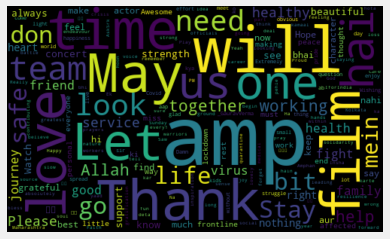

In [69]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": Rakh Do Gaj Ki Doori,Na Dilon Mein Faasla\nH...",0.000000,0.000000,Neutral
1,Thank you all for getting us in touch with the...,0.650000,0.078125,Positive
2,"Kolkata, with unity comes strength and resilie...",0.000000,0.000000,Neutral
3,All my career my friend colleague and absolute...,0.912500,0.800000,Positive
4,May the blessings of Allah see us through thes...,0.600000,0.500000,Positive
...,...,...,...,...
95,Damn multiple choice questions!? Was always aw...,0.500000,-0.500000,Negative
96,Bas aap Dua mein yaad rakhna.,0.000000,0.000000,Neutral
97,The ‘right thing’ is a personal feeling. Not b...,0.594286,0.334286,Positive
98,Wear a helmet!!!,0.000000,0.000000,Neutral


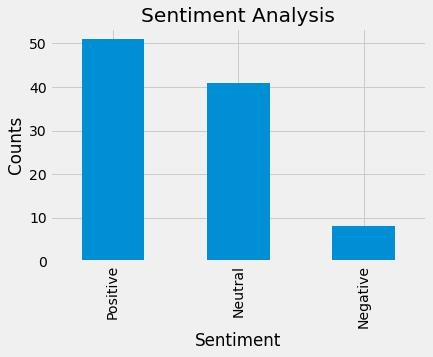

In [64]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()